# Big-Data for Computational Finance - Assignment 1

## Introduction

### Project Objectives
The  objective of this project is to implement and solve the Markowitz portfolio optimization model using Python. This involves formulating the problem as a quadratic optimization task and exploring various constraints to analyze their impact on the efficient frontier.

### Tasks and Requirements
The project consists of the following tasks:

1. **Task 1: Solve the Original Problem**
   - Formulate and solve the Markowitz portfolio optimization problem with the standard constraints.
   - Plot the efficient frontier for different expected returns.

2. **Task 2: Modify the Investment Constraint**
   - Modify the total investment constraint to \(\mathbf{e}^T \mathbf{x} \leq 1\) and solve the optimization problem.
   - Compare the results with the original problem.

3. **Task 3: Change the Return Constraint**
   - Change the return constraint to \(\boldsymbol{\mu}^T \mathbf{x} \geq r\) and solve the optimization problem.
   - Analyze the impact of this modification on the efficient frontier.

4. **Task 4: Allow Short Selling**
   - Remove the non-negativity constraint (\(\mathbf{x} \geq \mathbf{0}\)) to allow short selling.
   - Solve the optimization problem and compare the results with previous tasks.

### Theoretical Foundation
The Markowitz model, also known as the mean-variance optimization model, aims to determine the optimal allocation of capital across a set of assets. The goal is to minimize the portfolio's risk (variance) for a given level of expected return. This optimization problem can be expressed mathematically as:

\[ 
\begin{align*}
\text{Minimize} & \quad \mathbf{x}^T \mathbf{C} \mathbf{x} \\
\text{Subject to} & \quad \boldsymbol{\mu}^T \mathbf{x} = r \\
& \quad \mathbf{e}^T \mathbf{x} = 1 \\
& \quad \mathbf{x} \geq \mathbf{0}
\end{align*}
\]

Where:
- \(\mathbf{x}\) is the vector of asset weights.
- \(\mathbf{C}\) is the covariance matrix of asset returns.
- \(\boldsymbol{\mu}\) is the vector of expected returns.
- \(r\) is the desired portfolio return.
- \(\mathbf{e}\) is a vector of ones ensuring the sum of weights is equal to 1.



# Importing Necessary Libraries

In [1]:
import numpy as np
import random 
from qpsolvers import solve_qp
import matplotlib.pyplot as plt

C:\Users\muneeb ur rehman\AppData\Roaming\Python\Python312\site-packages\qpsolvers\solvers\__init__.py:711: UserWarning: no QP solver found on your system, you can install solvers from PyPI by ``pip install qpsolvers[open_source_solvers]``
  warnings.warn(


In [2]:
n = 10
dig1 = 5  # replace with second-to-last digit of your registration number
dig2 = 6  # replace with last digit of your registration number

dummyrepetitions = 10 * dig1 + dig2
for k in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

Corr = np.array([[0] * 10 for i in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i - j) / (abs(i - j) + 1)


In [3]:
from qpsolvers import solve_qp

In [4]:
def solve_markowitz(C, mu, r_values):
    n = len(mu)
    solutions = []
    for r in r_values:
        P = C
        q = np.zeros(n)
        G = -np.eye(n)
        h = np.zeros(n)
        A = np.vstack([mu, np.ones(n)])
        b = np.array([r, 1])
        x = solve_qp(P, q, G, h, A, b)
        solutions.append(x)
    return solutions

r_values = np.arange(2.00, 9.25, 0.25)
solutions = solve_markowitz(C, mmu, r_values)

NameError: name 'C' is not defined

In [ ]:
np.array([[0]*2])

In [ ]:

np.array([[0]*3])

In [ ]:
 np.array([[0]*i for i in range(10)])

In [ ]:
for i in range(10):
    sum =[0]*i
sum

In [ ]:
np.array([[0] * n for i in range(n)], dtype=float)

C:\Users\muneeb ur rehman\AppData\Local\Temp\ipykernel_14544\2262118902.py:30: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x.T @ C @ x)


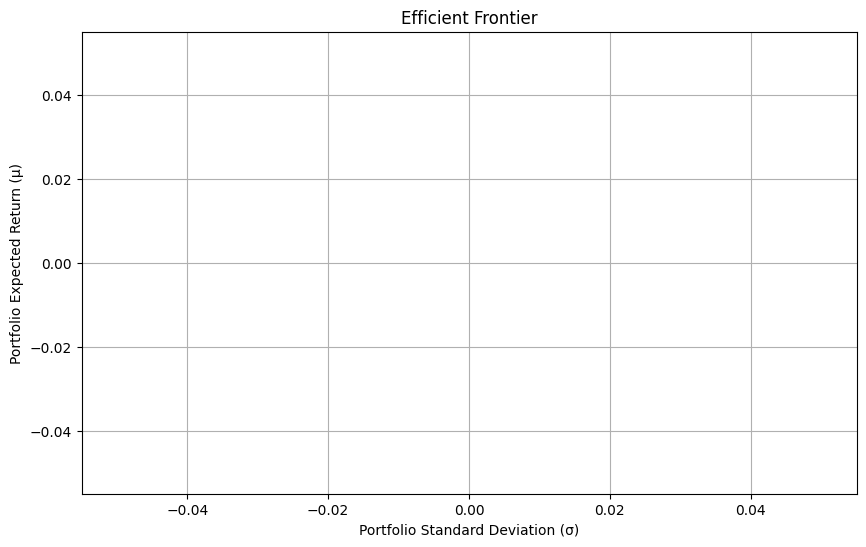

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming the given script is used to generate C and mmu
n = 10
dig1 = 0  # Replace with the second-to-last digit of your registration number
dig2 = 0  # Replace with the last digit of your registration number
dummyrepetitions = 10 * dig1 + dig2

# Generate the correlation matrix
Corr = np.array([[-1**abs(i-j)/(abs(i-j)+1) for j in range(n)] for i in range(n)])
ssigma = np.zeros((n, 1))
mmu = np.zeros((n, 1))
ssigma[0] = 2
mmu[0] = 3

# Generate ssigma and mmu
for i in range(1, n):
    ssigma[i] = ssigma[i-1] + 2 * np.random.uniform(0, 1)
    mmu[i] = mmu[i-1] + 1

# Generate the covariance matrix C
ddiag = np.diag(ssigma.flatten())
C2 = ddiag @ Corr @ ddiag
C = 0.5 * (C2 + C2.T)

# Function to compute the portfolio variance and return
def portfolio_variance(x, C):
    return np.sqrt(x.T @ C @ x)

def portfolio_return(x, mmu):
    return mmu.T @ x

# Constraints for optimization
def constraint_eq(x):
    return np.sum(x) - 1

def constraint_return(x, target_return, mmu):
    return portfolio_return(x, mmu) - target_return

# Range of target returns
target_returns = np.arange(2.00, 9.25, 0.25)
portfolio_variances = []
portfolio_returns = []

# Optimization
for r in target_returns:
    constraints = [{'type': 'eq', 'fun': constraint_eq},
                   {'type': 'eq', 'fun': constraint_return, 'args': (r, mmu)}]
    bounds = [(0, 1) for _ in range(n)]
    result = minimize(portfolio_variance, x0=np.ones(n)/n, args=(C,), bounds=bounds, constraints=constraints)
    
    if result.success:
        x_opt = result.x
        portfolio_variances.append(portfolio_variance(x_opt, C))
        portfolio_returns.append(portfolio_return(x_opt, mmu))
    else:
        portfolio_variances.append(np.nan)
        portfolio_returns.append(np.nan)

# Convert to numpy arrays for plotting
portfolio_variances = np.array(portfolio_variances)
portfolio_returns = np.array(portfolio_returns)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(portfolio_variances, portfolio_returns, marker='o')
plt.xlabel('Portfolio Standard Deviation (σ)')
plt.ylabel('Portfolio Expected Return (μ)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


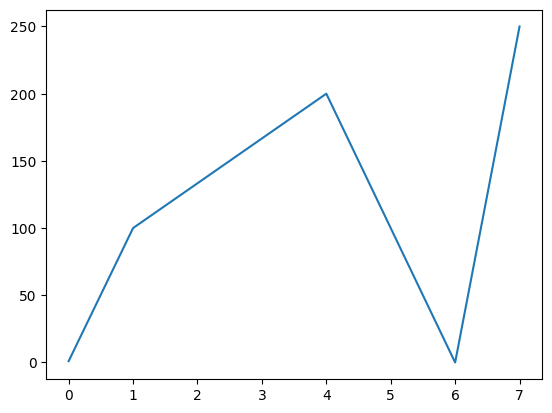

In [18]:
xpoints = np.array([0,1,4,6, 7])
ypoints = np.array([1,100,200,0 ,250])

plt.plot(xpoints, ypoints)
plt.show()


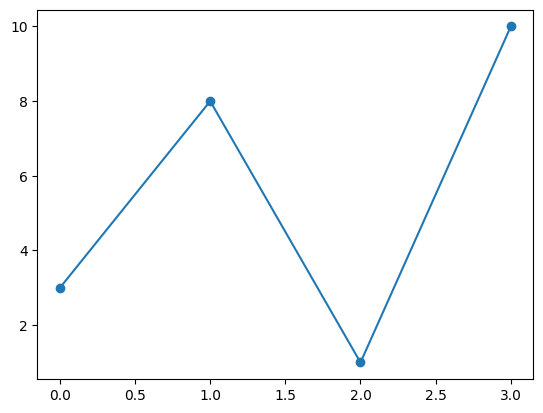

In [24]:
ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, marker = 'o')
plt.show()